# Imports

In [48]:
# install additional packages if running on Emscripten
import platform

notebook_platform = platform.uname()
if notebook_platform.system == "Emscripten":
    import piplite

    await piplite.install(["openpyxl", "seaborn"])

In [49]:
from enum import Enum
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks", {"axes.grid": True})

# Detector data

In [50]:
this_file = pathlib.Path().absolute()
data_dir = this_file.parent / "data"
data_dir

PosixPath('/home/grzanka/workspace/tld_let_calibration/data')

In [51]:
radiation = Enum("rad_type", "proton Co60")
detector = Enum("detector", "mcp mts")

In [52]:
df_calib = pd.read_csv(data_dir / "interim" / "signal.csv")
df_calib

,detector,rad_type,det_id,filename,signal,proton_co60_ratio
0,mcp,Co60,1,1_5.dat,1.307468e+09,NaN
1,mcp,Co60,2,2_6.dat,1.236975e+09,NaN
2,mcp,Co60,3,3_7.dat,1.290799e+09,NaN
3,mcp,Co60,4,4_8.dat,1.288080e+09,NaN
4,mcp,Co60,5,5_9.dat,1.290176e+09,NaN
...,...,...,...,...,...,...
274,mts,proton,66,66_77.dat,8.324386e+07,1.008197
275,mts,proton,67,67b_81.dat,8.012930e+07,0.990298
276,mts,proton,68,68b_82.dat,8.093331e+07,0.967083
277,mts,proton,69,69b_83.dat,8.161040e+07,0.983827


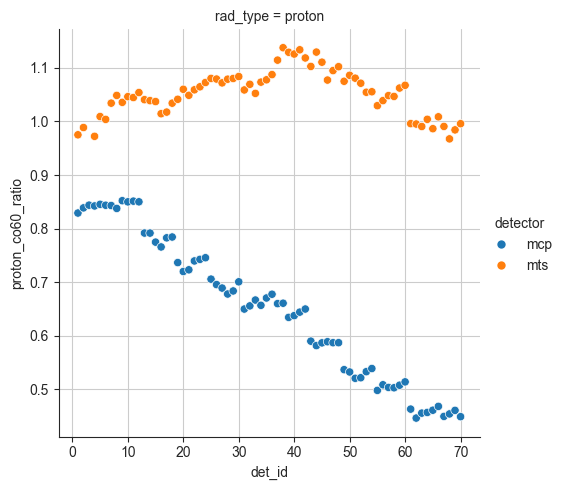

In [53]:
sns.relplot(
    data=df_calib[df_calib.rad_type == radiation.proton.name],
    x="det_id",
    y="proton_co60_ratio",
    hue="detector",
    col="rad_type",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=True),
)

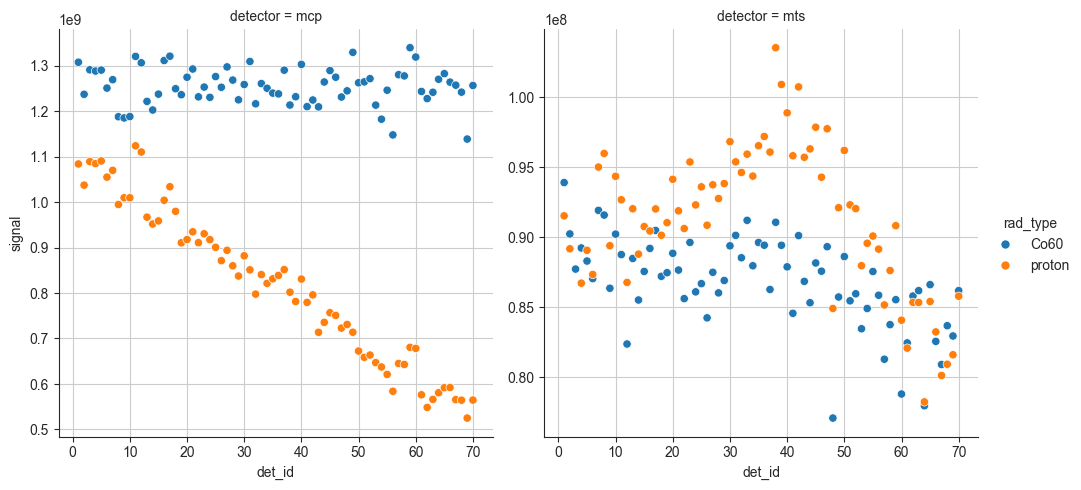

In [54]:
sns.relplot(
    data=df_calib,
    x="det_id",
    y="signal",
    hue="rad_type",
    col="detector",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=False),
)

## Proton irradiation data

In [55]:
df_proton_mts = pd.read_excel(
    data_dir / "interim" / "Wyniki_DK_IFJ.xlsx",
    sheet_name="ifj_calib_mts",
    usecols="W,X,Z",
    names=["energy_MeV", "pmma_wheel_steps", "dose_Gy"],
)
df_proton_mts.dropna(axis=0, how="all", inplace=True, subset="dose_Gy")
df_proton_mts["pmma_wheel_steps"] = df_proton_mts["pmma_wheel_steps"].astype(int)
df_proton_mts.insert(loc=0, column="detector", value=detector.mts.name)
df_proton_mts["det_id"] = [
    [61, 62, 63, 64, 65, 66],
    [55, 56, 57, 58, 59, 60],
    [49, 50, 51, 52, 53, 54],
    [43, 44, 45, 46, 47, 48],
    [37, 38, 39, 40, 41, 42],
    [31, 32, 33, 34, 35, 36],
    [25, 26, 27, 28, 29, 30],
    [19, 20, 21, 22, 23, 24],
    [13, 14, 15, 16, 17, 18],
    [7, 8, 9, 10, 11, 12],
    [1, 2, 3, 4, 5, 6],
]
df_proton_mts

,detector,energy_MeV,pmma_wheel_steps,dose_Gy,det_id
12,mts,4.92,6895,1.01,"[61, 62, 63, 64, 65, 66]"
19,mts,5.5,6855,0.99,"[55, 56, 57, 58, 59, 60]"
26,mts,6.3,6802,0.98,"[49, 50, 51, 52, 53, 54]"
33,mts,7.7,6717,0.99,"[43, 44, 45, 46, 47, 48]"
40,mts,10,6542,1.02,"[37, 38, 39, 40, 41, 42]"
47,mts,13,6365,1.03,"[31, 32, 33, 34, 35, 36]"
54,mts,16,6098,1.00,"[25, 26, 27, 28, 29, 30]"
61,mts,21,5645,0.99,"[19, 20, 21, 22, 23, 24]"
68,mts,30,4462,1.00,"[13, 14, 15, 16, 17, 18]"
75,mts,42,2645,1.01,"[7, 8, 9, 10, 11, 12]"


In [56]:
df_proton_mcp = pd.read_excel(
    data_dir / "interim" / "Wyniki_DK_IFJ.xlsx",
    sheet_name="ifj_calib_mcp",
    usecols="K,L,V",
    names=["energy_MeV", "pmma_wheel_steps", "dose_Gy"],
)
df_proton_mcp.dropna(axis=0, how="all", inplace=True, subset="dose_Gy")
df_proton_mcp["pmma_wheel_steps"] = df_proton_mcp["pmma_wheel_steps"].astype(int)
df_proton_mcp.insert(loc=0, column="detector", value=detector.mcp.name)
df_proton_mcp["det_id"] = df_proton_mts.det_id.copy()
df_proton_mcp

,detector,energy_MeV,pmma_wheel_steps,dose_Gy,det_id
12,mcp,4.92,6895,1.01,"[61, 62, 63, 64, 65, 66]"
19,mcp,5.5,6855,0.99,"[55, 56, 57, 58, 59, 60]"
26,mcp,6.3,6802,0.98,"[49, 50, 51, 52, 53, 54]"
33,mcp,7.7,6717,0.99,"[43, 44, 45, 46, 47, 48]"
40,mcp,10,6542,1.02,"[37, 38, 39, 40, 41, 42]"
47,mcp,13,6365,1.03,"[31, 32, 33, 34, 35, 36]"
54,mcp,16,6098,1.00,"[25, 26, 27, 28, 29, 30]"
61,mcp,21,5645,0.99,"[19, 20, 21, 22, 23, 24]"
68,mcp,30,4462,1.00,"[13, 14, 15, 16, 17, 18]"
75,mcp,42,2645,1.01,"[7, 8, 9, 10, 11, 12]"


In [57]:
df_proton = pd.concat([df_proton_mts, df_proton_mcp])
df_proton.detector = df_proton.detector.astype("category")
df_proton

,detector,energy_MeV,pmma_wheel_steps,dose_Gy,det_id
12,mts,4.92,6895,1.01,"[61, 62, 63, 64, 65, 66]"
19,mts,5.5,6855,0.99,"[55, 56, 57, 58, 59, 60]"
26,mts,6.3,6802,0.98,"[49, 50, 51, 52, 53, 54]"
33,mts,7.7,6717,0.99,"[43, 44, 45, 46, 47, 48]"
40,mts,10,6542,1.02,"[37, 38, 39, 40, 41, 42]"
47,mts,13,6365,1.03,"[31, 32, 33, 34, 35, 36]"
54,mts,16,6098,1.00,"[25, 26, 27, 28, 29, 30]"
61,mts,21,5645,0.99,"[19, 20, 21, 22, 23, 24]"
68,mts,30,4462,1.00,"[13, 14, 15, 16, 17, 18]"
75,mts,42,2645,1.01,"[7, 8, 9, 10, 11, 12]"


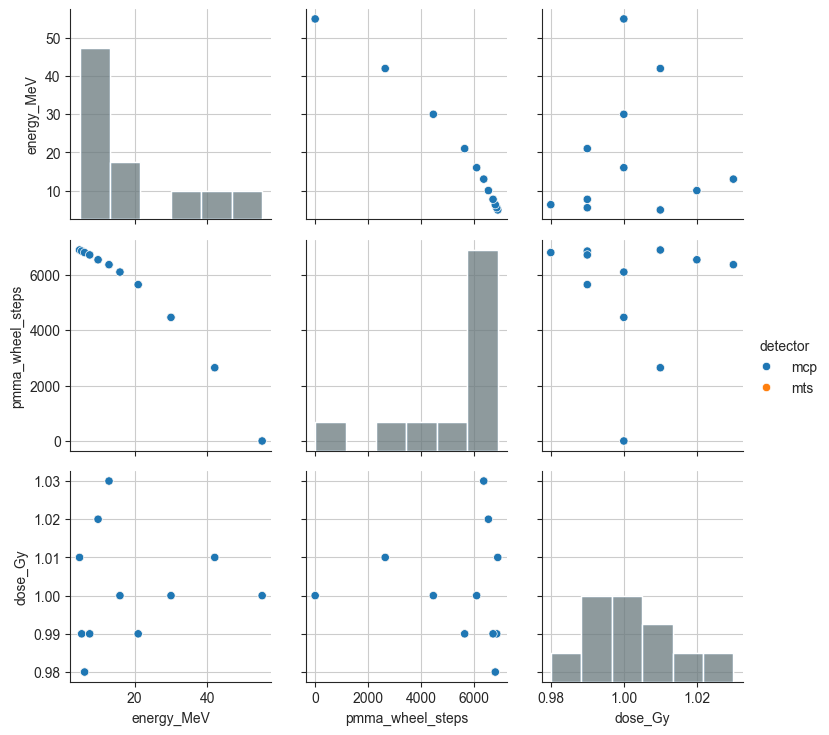

In [58]:
g = sns.PairGrid(df_proton, hue="detector")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Merge the dataframes

In [59]:
df_eff = pd.merge(df_proton.explode("det_id"), df_calib, on=["det_id", "detector"], how="left")
df_eff

,detector,energy_MeV,pmma_wheel_steps,dose_Gy,det_id,rad_type,filename,signal,proton_co60_ratio
0,mts,4.92,6895,1.01,61,Co60,61_69.dat,8.245750e+07,NaN
1,mts,4.92,6895,1.01,61,proton,61_72.dat,8.208503e+07,0.995483
2,mts,4.92,6895,1.01,62,Co60,62_70.dat,8.580697e+07,NaN
3,mts,4.92,6895,1.01,62,proton,62_73.dat,8.535597e+07,0.994744
4,mts,4.92,6895,1.01,63,Co60,63_71.dat,8.619362e+07,NaN
...,...,...,...,...,...,...,...,...,...
258,mcp,55,0,1.00,4,proton,4_7.dat,1.084600e+09,0.842029
259,mcp,55,0,1.00,5,Co60,5_9.dat,1.290176e+09,NaN
260,mcp,55,0,1.00,5,proton,5_8.dat,1.090357e+09,0.845122
261,mcp,55,0,1.00,6,Co60,6_10.dat,1.250622e+09,NaN


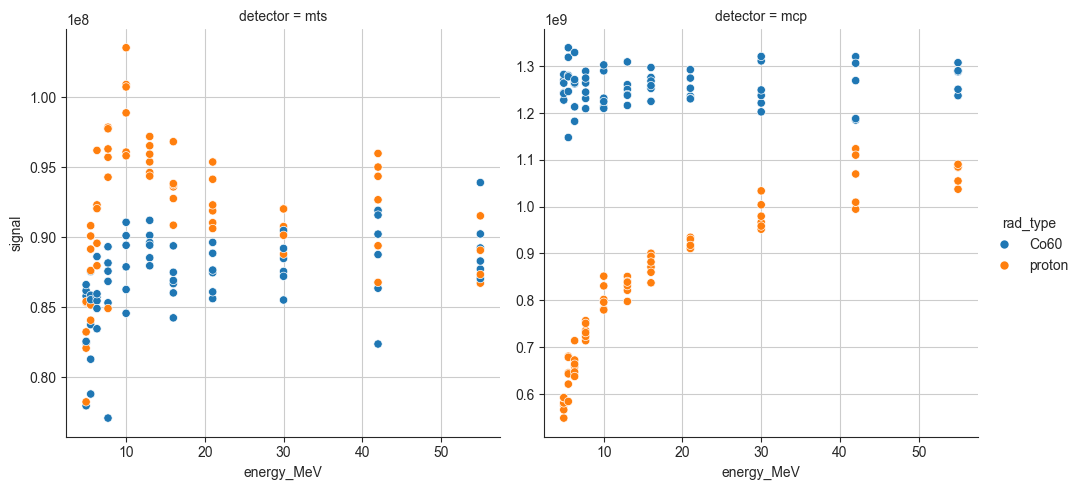

In [60]:
sns.relplot(
    data=df_eff,
    x="energy_MeV",
    y="signal",
    hue="rad_type",
    col="detector",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=False),
)

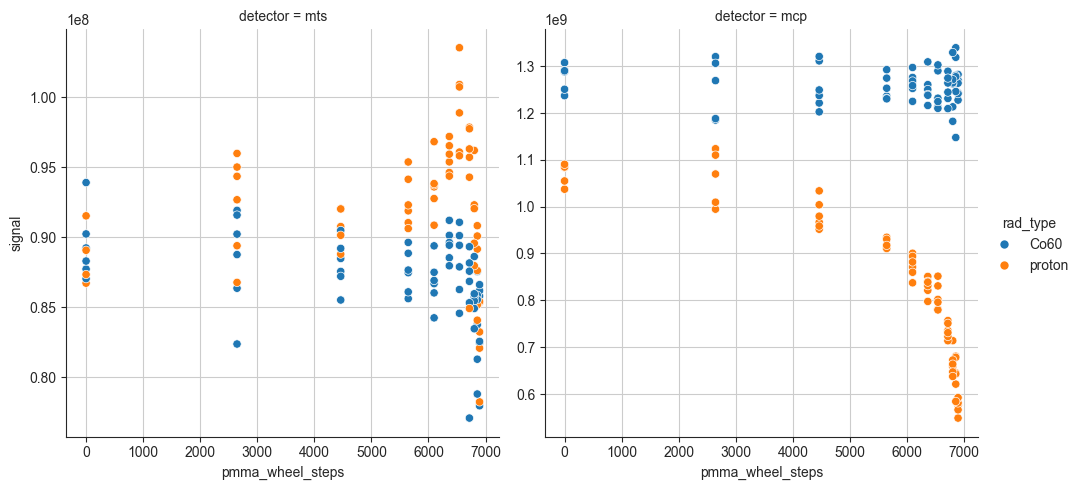

In [61]:
sns.relplot(
    data=df_eff,
    x="pmma_wheel_steps",
    y="signal",
    hue="rad_type",
    col="detector",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=False),
)

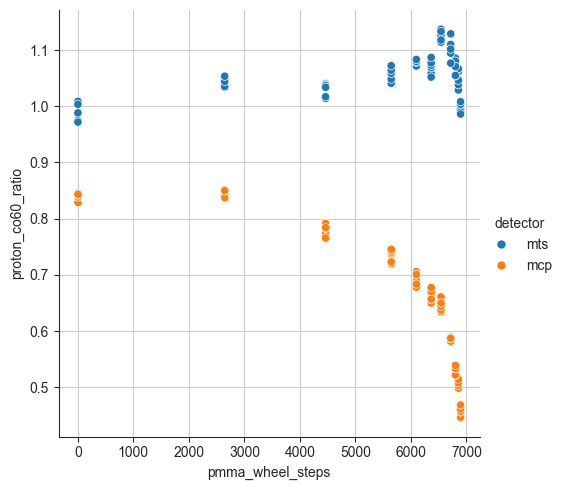

In [62]:
sns.relplot(
    data=df_eff,
    x="pmma_wheel_steps",
    y="proton_co60_ratio",
    hue="detector",
    kind="scatter",
)

In [63]:
df_eff["eff"] = float("nan")
dose_Co60 = 1
for name, df in df_eff.groupby(["detector", "det_id"]):
    dose_proton_Gy = df[df.rad_type == radiation.proton.name].dose_Gy.values
    eff = df[df.rad_type == radiation.proton.name].signal.values / dose_proton_Gy
    eff /= df[df.rad_type == radiation.Co60.name].signal.values / dose_Co60
    df_eff.loc[
        (df_eff.det_id == name[1]) & (df_eff.detector == name[0]) & (df_eff.rad_type == radiation.proton.name),
        "eff",
    ] = eff
df_eff

,detector,energy_MeV,pmma_wheel_steps,dose_Gy,det_id,rad_type,filename,signal,proton_co60_ratio,eff
0,mts,4.92,6895,1.01,61,Co60,61_69.dat,8.245750e+07,NaN,NaN
1,mts,4.92,6895,1.01,61,proton,61_72.dat,8.208503e+07,0.995483,0.985627
2,mts,4.92,6895,1.01,62,Co60,62_70.dat,8.580697e+07,NaN,NaN
3,mts,4.92,6895,1.01,62,proton,62_73.dat,8.535597e+07,0.994744,0.984895
4,mts,4.92,6895,1.01,63,Co60,63_71.dat,8.619362e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
258,mcp,55,0,1.00,4,proton,4_7.dat,1.084600e+09,0.842029,0.842029
259,mcp,55,0,1.00,5,Co60,5_9.dat,1.290176e+09,NaN,NaN
260,mcp,55,0,1.00,5,proton,5_8.dat,1.090357e+09,0.845122,0.845122
261,mcp,55,0,1.00,6,Co60,6_10.dat,1.250622e+09,NaN,NaN


<Axes: xlabel='pmma_wheel_steps', ylabel='eff'>

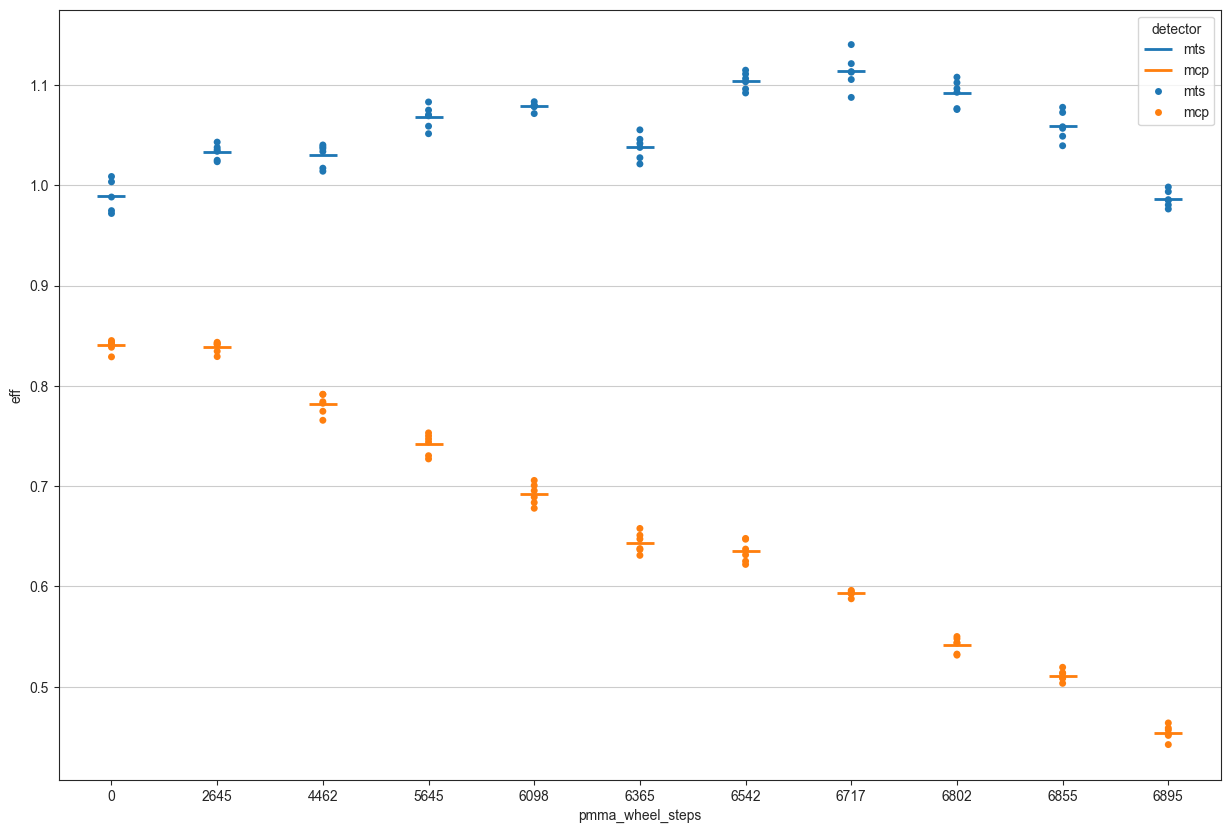

In [64]:
f, ax = plt.subplots(figsize=(15, 10))
sns.pointplot(
    data=df_eff,
    x="pmma_wheel_steps",
    y="eff",
    hue="detector",
    linestyles="none",
    markers="_",
    markersize=20,
    errorbar=None,
    ax=ax,
)
# Add in points to show each observation
sns.stripplot(data=df_eff, x="pmma_wheel_steps", y="eff", jitter=False, hue="detector", ax=ax)

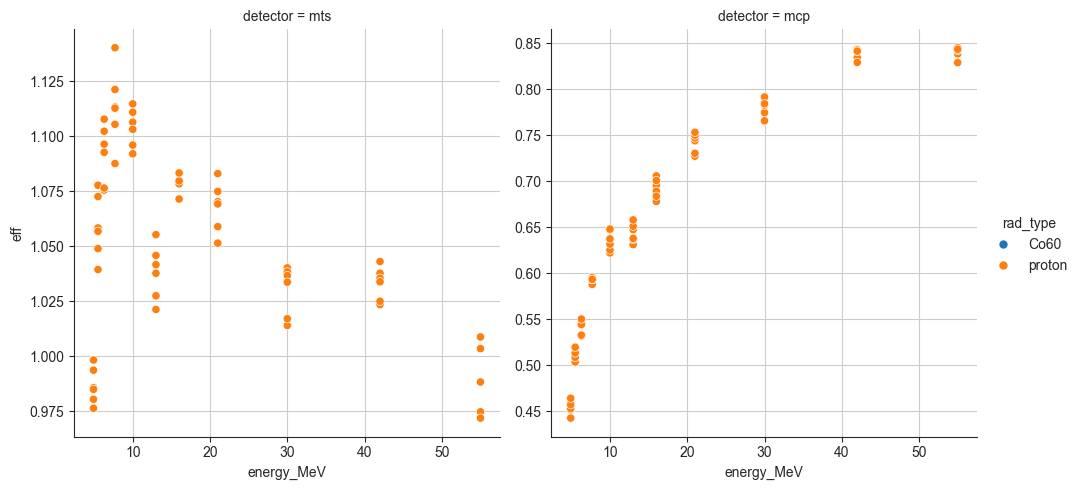

In [65]:
sns.relplot(
    data=df_eff,
    x="energy_MeV",
    y="eff",
    hue="rad_type",
    col="detector",
    kind="scatter",
    facet_kws=dict(sharex=True, sharey=False),
)

In [66]:
df_eff

,detector,energy_MeV,pmma_wheel_steps,dose_Gy,det_id,rad_type,filename,signal,proton_co60_ratio,eff
0,mts,4.92,6895,1.01,61,Co60,61_69.dat,8.245750e+07,NaN,NaN
1,mts,4.92,6895,1.01,61,proton,61_72.dat,8.208503e+07,0.995483,0.985627
2,mts,4.92,6895,1.01,62,Co60,62_70.dat,8.580697e+07,NaN,NaN
3,mts,4.92,6895,1.01,62,proton,62_73.dat,8.535597e+07,0.994744,0.984895
4,mts,4.92,6895,1.01,63,Co60,63_71.dat,8.619362e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
258,mcp,55,0,1.00,4,proton,4_7.dat,1.084600e+09,0.842029,0.842029
259,mcp,55,0,1.00,5,Co60,5_9.dat,1.290176e+09,NaN,NaN
260,mcp,55,0,1.00,5,proton,5_8.dat,1.090357e+09,0.845122,0.845122
261,mcp,55,0,1.00,6,Co60,6_10.dat,1.250622e+09,NaN,NaN


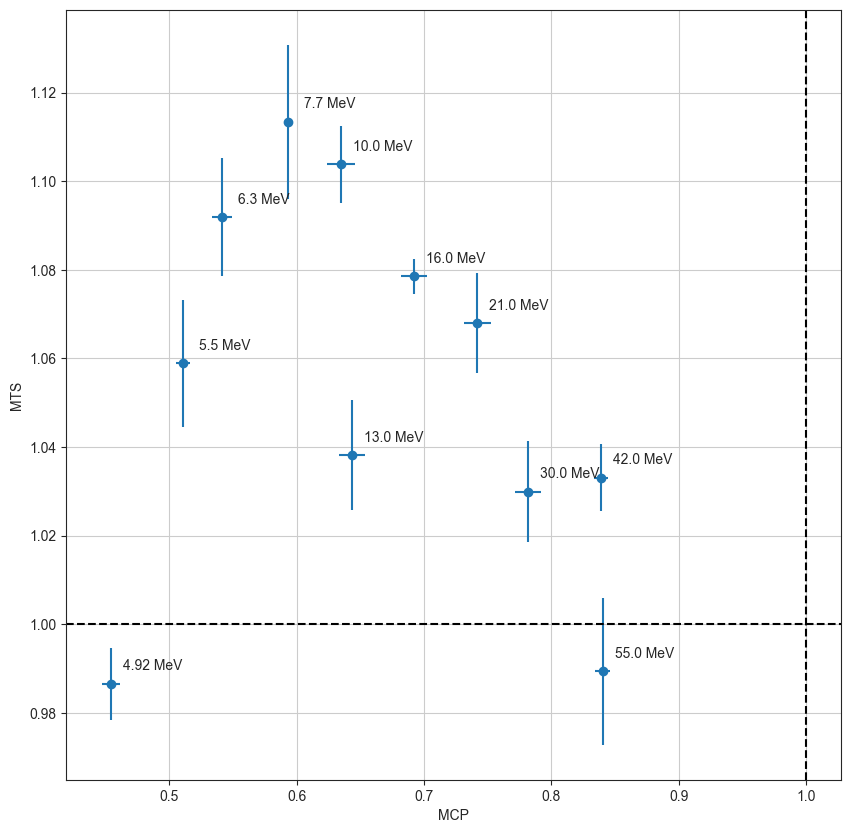

In [67]:
df_scatter = df_eff[df_eff.rad_type == radiation.proton.name].groupby(["energy_MeV", "detector"]).eff.mean()
df_scatter_err = df_eff[df_eff.rad_type == radiation.proton.name].groupby(["energy_MeV", "detector"]).eff.std()

fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(
    x=df_scatter[:, detector.mcp.name],
    y=df_scatter[:, detector.mts.name],
    xerr=df_scatter_err[:, detector.mcp.name],
    yerr=df_scatter_err[:, detector.mts.name],
    fmt="o",
)
ax.set_xlabel("MCP")
ax.set_ylabel("MTS")

# Add text labels over each point
for x, y, label in zip(
    df_scatter[:, detector.mcp.name], df_scatter[:, detector.mts.name], df_scatter_err.loc[:, detector.mcp.name].index
):
    ax.annotate(f"{label} MeV", (x, y), textcoords="offset points", xytext=(30, 10), ha="center")

ax.axvline(1, color="black", linestyle="--")
ax.axhline(1, color="black", linestyle="--")

# ax.set_xlim(0.4, 1.2)
# ax.set_ylim(0.4, 1.2)
# ax.set_ylim(0, None)

In [68]:
for name, df in df_eff[(df_eff.rad_type == radiation.proton.name) & (df_eff.detector == detector.mts.name)].groupby(
    ["energy_MeV"]
):
    eff_perc_err = 100 * df.eff.std() / df.eff.mean()
    print(f"{name[0]} MeV: eff = {df.eff.mean():.2f} +- {eff_perc_err:.2f}%")

4.92 MeV: eff = 0.99 +- 0.83%
5.5 MeV: eff = 1.06 +- 1.35%
6.3 MeV: eff = 1.09 +- 1.22%
7.7 MeV: eff = 1.11 +- 1.56%
10.0 MeV: eff = 1.10 +- 0.79%
13.0 MeV: eff = 1.04 +- 1.19%
16.0 MeV: eff = 1.08 +- 0.36%
21.0 MeV: eff = 1.07 +- 1.06%
30.0 MeV: eff = 1.03 +- 1.11%
42.0 MeV: eff = 1.03 +- 0.73%
55.0 MeV: eff = 0.99 +- 1.67%


In [69]:
for name, df in df_eff[(df_eff.rad_type == radiation.proton.name) & (df_eff.detector == detector.mcp.name)].groupby(
    ["energy_MeV"]
):
    eff_perc_err = 100 * df.eff.std() / df.eff.mean()
    print(f"{name[0]} MeV: eff = {df.eff.mean():.2f} +- {eff_perc_err:.2f}%")

4.92 MeV: eff = 0.45 +- 1.63%
5.5 MeV: eff = 0.51 +- 1.08%
6.3 MeV: eff = 0.54 +- 1.44%
7.7 MeV: eff = 0.59 +- 0.49%
10.0 MeV: eff = 0.64 +- 1.72%
13.0 MeV: eff = 0.64 +- 1.57%
16.0 MeV: eff = 0.69 +- 1.52%
21.0 MeV: eff = 0.74 +- 1.44%
30.0 MeV: eff = 0.78 +- 1.29%
42.0 MeV: eff = 0.84 +- 0.67%
55.0 MeV: eff = 0.84 +- 0.72%


In [70]:
df_eff[df_eff.rad_type == radiation.proton.name].drop(
    columns=["rad_type", "filename", "proton_co60_ratio", "signal", "dose_Gy"]
).to_csv(data_dir / "interim" / "proton_eff.csv", index=False)